In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
df_all = pd.read_csv('./data/selected_projects.csv')

In [3]:
df_all.shape[0]

1454

In [4]:
df_gradle = pd.read_csv('./data/gradle_build_results.csv')

In [5]:
df_gradle.head()

,repo_name,build_tool,last_commit_sha,success,fail,unclear,error
0,joinfaces/joinfaces,gradle,6b379a0240fa3002c4321abc919e0d62fcc4164f,0,0,0,1
1,apereo/cas,gradle,32a5e5de26fd70c1229efe7d66676228c663d1fc,0,0,0,1
2,remkop/picocli,gradle,bd48d6f3934c25876931dce5fcc3677dbfc1f410,0,0,0,1
3,shedaniel/roughlyenoughitems,gradle,303fe1b4564b0f7df38df59453e761e4a279dea5,0,0,1,0
4,hortonworks/cloudbreak,gradle,ef36a65f738b4ebc9bf5d932133621ea085808b8,0,0,1,0


In [6]:
df_gradle.shape[0]

361

In [7]:
print("Successful builds: {}".format(df_gradle[df_gradle['success'] == 1].shape[0]))
print("Failed builds: {}".format(df_gradle[df_gradle['fail'] == 1].shape[0]))
print("Unclear builds: {}".format(df_gradle[df_gradle['unclear'] == 1].shape[0]))
print("Errors: {}".format(df_gradle[df_gradle['error'] == 1].shape[0]))

Successful builds: 202
Failed builds: 70
Unclear builds: 86
Errors: 3


In [8]:
print("Unsuccessful builds: {}".format(df_gradle[df_gradle['success'] != 1].shape[0]))

Unsuccessful builds: 159


In [9]:
count_success = df_gradle[df_gradle['success'] == 1].shape[0]
count_all = df_gradle.shape[0]
print("Gradle Success builds percentage: {:.2f}%".format(count_success*100/count_all))

Gradle Success builds percentage: 55.96%


In [10]:
df_maven = pd.read_csv('./data/maven_build_results.csv')

In [11]:
df_maven.shape[0]

686

In [12]:
print("Successful builds: {}".format(df_maven[df_maven['success'] == 1].shape[0]))
print("Failed builds: {}".format(df_maven[df_maven['fail'] == 1].shape[0]))
print("Unclear builds: {}".format(df_maven[df_maven['unclear'] == 1].shape[0]))
print("Errors: {}".format(df_maven[df_maven['error'] == 1].shape[0]))

Successful builds: 457
Failed builds: 203
Unclear builds: 22
Errors: 4


In [13]:
print("Unuccessful builds: {}".format(df_maven[df_maven['success'] != 1].shape[0]))

Unuccessful builds: 229


In [14]:
count_success = df_maven[df_maven['success'] == 1].shape[0]
count_all = df_maven.shape[0]
print("Maven success builds percentage: {:.2f}%".format(count_success*100/count_all))

Maven success builds percentage: 66.62%


In [15]:
df = pd.concat([df_gradle, df_maven])

In [16]:
print("Successful builds: {}".format(df[df['success'] == 1].shape[0]))
print("Failed builds: {}".format(df[df['fail'] == 1].shape[0]))
print("Unclear builds: {}".format(df[df['unclear'] == 1].shape[0]))
print("Errors: {}".format(df[df['error'] == 1].shape[0]))

Successful builds: 659
Failed builds: 273
Unclear builds: 108
Errors: 7


In [17]:
print("Unsuccessful builds: {}".format(df[df['success'] != 1].shape[0]))

Unsuccessful builds: 388


In [18]:
df.shape[0]

1047

In [19]:
count_success = df[df['success'] == 1].shape[0]
count_all = df.shape[0]
print("Success builds percentage: {:.2f}%".format(count_success*100/count_all))

Success builds percentage: 62.94%


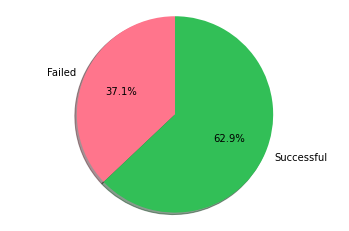

In [20]:
labels = 'Failed', 'Successful'
colors = ['#ff758c','#32bf57']
sizes = [388, 659]
explode = (0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors = colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [21]:
df.to_csv('data/local_build_results.csv', index=False)

In [22]:
df_add = pd.read_csv('./data/selected_projects_add.csv')

In [23]:
df_add.columns

Index(['Name', 'Is Fork', 'Commits', 'Branches', 'Default Branch', 'Releases',
       'Contributors', 'License', 'Watchers', 'Stargazers', 'Forks', 'Size',
       'Created At', 'Pushed At', 'Updated At', 'Homepage', 'Main Language',
       'Total Issues', 'Open Issues', 'Total Pull Requests',
       'Open Pull Requests', 'Last Commit', 'Last Commit SHA', 'Has Wiki',
       'Is Archived', 'Languages', 'Labels', 'checkstyle', 'findbugs', 'maven',
       'gradle', 'gradle_on_root', 'maven_usage_on_root', 'spotbugs',
       'android', 'commit_status'],
      dtype='object')

In [24]:
df_add[(df_add['maven'] == 1) & (df_add['gradle'] != 1)].shape[0]

737

In [25]:
df_add[df_add['gradle'] == 1].shape[0]

668

In [26]:
df_add[(df_add['maven'] != 1) & (df_add['gradle'] != 1)].shape[0]

49

In [27]:
def aggregate_failure(x, y, z):
    if x==1 or y==1 or z==1:
        return 1
    else:
        return 0

df['unseccessful'] = df.apply(lambda x: aggregate_failure(x.unclear, x.fail, x.error), axis=1)
df.head()

,repo_name,build_tool,last_commit_sha,success,fail,unclear,error,unseccessful
0,joinfaces/joinfaces,gradle,6b379a0240fa3002c4321abc919e0d62fcc4164f,0,0,0,1,1
1,apereo/cas,gradle,32a5e5de26fd70c1229efe7d66676228c663d1fc,0,0,0,1,1
2,remkop/picocli,gradle,bd48d6f3934c25876931dce5fcc3677dbfc1f410,0,0,0,1,1
3,shedaniel/roughlyenoughitems,gradle,303fe1b4564b0f7df38df59453e761e4a279dea5,0,0,1,0,1
4,hortonworks/cloudbreak,gradle,ef36a65f738b4ebc9bf5d932133621ea085808b8,0,0,1,0,1


In [28]:
df_grouped = df.groupby(by=['build_tool', 'success', 'unseccessful']).count().reset_index()
df_grouped.head()

,build_tool,success,unseccessful,repo_name,last_commit_sha,fail,unclear,error
0,gradle,0,1,159,159,159,159,159
1,gradle,1,0,202,202,202,202,202
2,maven,0,1,229,229,229,229,229
3,maven,1,0,457,457,457,457,457


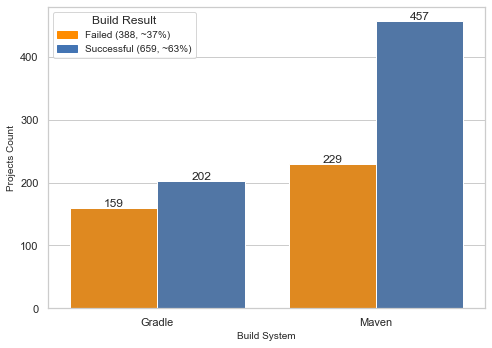

In [45]:
sns.set(rc={'figure.figsize':(5, 3), 'font.size': 12})

# Create an array with the colors you want to use
colors = ["#FF8C00", "#4374B3"]
# Set your custom color palette
sns.set(font_scale=0.75)
sns.set_theme(style="whitegrid")
sns.set_palette(sns.color_palette(colors))


ax = sns.barplot(x="build_tool", y="repo_name", hue="success", data=df_grouped)
ax.set_xlabel("Build System", fontsize = 10)
ax.set_ylabel("Projects Count", fontsize = 10)

orange_patch = mpatches.Patch(color=colors[0])
blue_patch = mpatches.Patch(color=colors[1])

ax.legend(title='Build Result', labels=['Failed (388, ~37%)', 'Successful (659, ~63%)'], handles=[orange_patch, blue_patch], fontsize = 10)

plt.xticks([0,1], ['Gradle', 'Maven'])
for container in ax.containers:
    ax.bar_label(container)

plt.gcf().set_size_inches(7,5)
plt.tight_layout()
plt.savefig('local-builds-bar-chart.pdf', dpi=300)